# Price Index Methods

In [68]:
"""
Price Indices Package

This package provides functions to calculate various price indices, including
both unweighted and weighted methods. The package includes native Python
implementations as well as pandas DataFrame-based implementations for flexible
data handling.

Unweighted Methods:
- Jevons Index
- Dutot Index
- Carli Index
- Balk-Mehrhoff-Walsh (BMW) Index

Weighted Methods:
- Laspeyres Index
- Paasche Index
- Fisher Index
- Törnqvist Index
- Walsh Index
- Sato-Vartia Index

The native Python functions calculate price indices using dictionaries for
input data, while the pandas functions work directly with DataFrames and
support specifying base and compared time periods for computing the indices.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program. If not, see <https://www.gnu.org/licenses/>.

Constants:
- _PD_DEFAULT_PRICE_COL: Default column name for prices in DataFrame.
- PD_DEFAULT_PRODUCT_ID_COL: Default column name for product IDs in DataFrame.
- _PD_DEFAULT_QUANTITY_COL: Default column name for quantities in DataFrame.
- _PD_DEFAULT_TIME_PERIOD_COL: Default column name for time periods in DataFrame.
- _DEFAULT_NORMALIZATION_VAL: Default normalization value for indices.

Functions:
Unweighted Methods (Native Python):
- jevons_index
- dutot_index
- carli_index
- bmw_index

Unweighted Methods (pandas DataFrame):
- jevons_index_from_df
- dutot_index_from_df
- carli_index_from_df
- bmw_index_from_df

Weighted Methods (Native Python):
- laspeyres_index
- paasche_index
- fisher_index
- tornqvist_index
- walsh_index
- sato_vartia_index

Weighted Methods (pandas DataFrame):
- laspeyres_index_from_df
- paasche_index_from_df
- fisher_index_from_df
- tornqvist_index_from_df
- walsh_index_from_df
- sato_vartia_index_from_df
"""


'\nPrice Indices Package\n\nThis package provides functions to calculate various price indices, including\nboth unweighted and weighted methods. The package includes native Python\nimplementations as well as pandas DataFrame-based implementations for flexible\ndata handling.\n\nUnweighted Methods:\n- Jevons Index\n- Dutot Index\n- Carli Index\n- Balk-Mehrhoff-Walsh (BMW) Index\n\nWeighted Methods:\n- Laspeyres Index\n- Paasche Index\n- Fisher Index\n- Törnqvist Index\n- Walsh Index\n- Sato-Vartia Index\n\nThe native Python functions calculate price indices using dictionaries for\ninput data, while the pandas functions work directly with DataFrames and\nsupport specifying base and compared time periods for computing the indices.\n\nThis program is free software: you can redistribute it and/or modify\nit under the terms of the GNU General Public License as published by\nthe Free Software Foundation, either version 3 of the License, or\n(at your option) any later version.\n\nThis program 

## Dependencies

In [69]:
import numpy as np
import pandas as pd
from typing import Dict
from math import sqrt, log, exp

## Module Constants

In [70]:

PD_DEFAULT_PRICE_COL = 'price'
PD_DEFAULT_PRODUCT_ID_COL = 'product_id'
PD_DEFAULT_QUANTITY_COL = 'quantity'
PD_DEFAULT_TIME_PERIOD_COL = 'time_period'
DEFAULT_NORMALIZATION_VAL = 100.0

# Price Indices

## Bilateral Methods

### Unweighted Methods


In [71]:
def jevons_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Jevons price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Jevons price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys())
    n = len(matched_products)

    if n == 0:
        raise ValueError("No matched products found.")

    product = 1.0
    for product_id in matched_products:
        product *= (prices_t[product_id] / prices_0[product_id]) ** (1 / n)

    return product * normalization_value

def jevons_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Jevons price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Jevons price index.

    Raises:
        ValueError: If no matched products are found.
    """

    required_columns = {price_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")

    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    
    matched_products = prices_0.index.intersection(prices_t.index)
    if matched_products.empty:
        raise ValueError("No matched products found.")
    
    ratios = prices_t.loc[matched_products] / prices_0.loc[matched_products]
    geometric_mean = np.exp(np.mean(np.log(ratios)))
    
    return geometric_mean * normalization_value

In [72]:
def dutot_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Dutot price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Dutot price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys())

    if not matched_products:
        raise ValueError("No matched products found.")

    sum_prices_0 = sum(prices_0[product_id] for product_id in matched_products)
    sum_prices_t = sum(prices_t[product_id] for product_id in matched_products)

    return (sum_prices_t / sum_prices_0) * normalization_value

def dutot_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Dutot price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Dutot price index.

    Raises:
        ValueError: If no matched products are found.
    """
    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    
    matched_products = prices_0.index.intersection(prices_t.index)
    if matched_products.empty:
        raise ValueError("No matched products found.")
    
    return (prices_t.loc[matched_products].sum() / prices_0.loc[matched_products].sum()) * normalization_value

In [73]:
def carli_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Carli price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Carli price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys())
    n = len(matched_products)

    if n == 0:
        raise ValueError("No matched products found.")

    sum_relatives = sum(prices_t[product_id] / prices_0[product_id] for product_id in matched_products)

    return (sum_relatives / n) * normalization_value

def carli_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Carli price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Carli price index.

    Raises:
        ValueError: If no matched products are found.
    """
    required_columns = {price_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")
    
    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    
    matched_products = prices_0.index.intersection(prices_t.index)
    if matched_products.empty:
        raise ValueError("No matched products found.")
    
    relatives = prices_t.loc[matched_products] / prices_0.loc[matched_products]
    arithmetic_mean = relatives.mean()
    
    return arithmetic_mean * normalization_value

In [74]:
def bmw_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Balk-Mehrhoff-Walsh (BMW) price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: BMW price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys())

    if not matched_products:
        raise ValueError("No matched products found.")

    numerator = 0.0
    denominator = 0.0

    for product_id in matched_products:
        price_0 = prices_0[product_id]
        price_t = prices_t[product_id]
        price_ratio = price_t / price_0
        weight = (price_0 / price_t) ** 0.5

        numerator += price_ratio * weight
        denominator += weight

    if denominator == 0:
        raise ValueError("Denominator is zero, cannot compute BMW index.")

    return (numerator / denominator) * normalization_value

def bmw_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Balk-Mehrhoff-Walsh (BMW) price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: BMW price index.

    Raises:
        ValueError: If no matched products are found.
    """
    required_columns = {price_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")
    
    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    
    matched_products = prices_0.index.intersection(prices_t.index)
    if matched_products.empty:
        raise ValueError("No matched products found.")
    
    price_ratios = prices_t.loc[matched_products] / prices_0.loc[matched_products]
    weights = np.sqrt(prices_0.loc[matched_products] / prices_t.loc[matched_products])
    
    numerator = np.sum(price_ratios * weights)
    denominator = np.sum(weights)
    
    if denominator == 0:
        raise ValueError("Denominator is zero, cannot compute BMW index.")
    
    return (numerator / denominator) * normalization_value


### Weighted Methods

In [75]:
def laspeyres_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    quantities_0: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Laspeyres price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        quantities_0 (Dict[str, float]): Quantities of products at the base time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Laspeyres price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys()) & set(quantities_0.keys())
    
    if not matched_products:
        raise ValueError("No matched products found.")
    
    numerator = sum(quantities_0[product_id] * prices_t[product_id] for product_id in matched_products)
    denominator = sum(quantities_0[product_id] * prices_0[product_id] for product_id in matched_products)
    
    return (numerator / denominator) * normalization_value

def laspeyres_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    quantity_col: str = PD_DEFAULT_QUANTITY_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Laspeyres price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price and quantity data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        quantity_col (str): The name of the column containing the quantities. Defaults to 'quantity'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Laspeyres price index.

    Raises:
        ValueError: If no matched products are found.
        AttributeError: If the DataFrame does not contain the necessary columns.
    """
    required_columns = {price_col, quantity_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")

    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    quantities_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[quantity_col]

    matched_products = prices_0.index.intersection(prices_t.index).intersection(quantities_0.index)
    if matched_products.empty:
        raise ValueError("No matched products are found.")

    numerator = np.sum(quantities_0.loc[matched_products] * prices_t.loc[matched_products])
    denominator = np.sum(quantities_0.loc[matched_products] * prices_0.loc[matched_products])

    return (numerator / denominator) * normalization_value

In [76]:
def paasche_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    quantities_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Paasche price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        quantities_t (Dict[str, float]): Quantities of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Paasche price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys()) & set(quantities_t.keys())
    
    if not matched_products:
        raise ValueError("No matched products found.")
    
    numerator = sum(quantities_t[product_id] * prices_t[product_id] for product_id in matched_products)
    denominator = sum(quantities_t[product_id] * prices_0[product_id] for product_id in matched_products)
    
    return (numerator / denominator) * normalization_value


def paasche_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    quantity_col: str = PD_DEFAULT_QUANTITY_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Paasche price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price and quantity data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        quantity_col (str): The name of the column containing the quantities. Defaults to 'quantity'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Paasche price index.

    Raises:
        ValueError: If no matched products are found.
        AttributeError: If the DataFrame does not contain the necessary columns.
    """
    required_columns = {price_col, quantity_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")

    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    quantities_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[quantity_col]

    matched_products = prices_0.index.intersection(prices_t.index).intersection(quantities_t.index)
    if matched_products.empty:
        raise ValueError("No matched products are found.")

    numerator = np.sum(quantities_t.loc[matched_products] * prices_t.loc[matched_products])
    denominator = np.sum(quantities_t.loc[matched_products] * prices_0.loc[matched_products])

    return (numerator / denominator) * normalization_value


In [77]:
def fisher_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    quantities_0: Dict[str, float],
    quantities_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Fisher price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        quantities_0 (Dict[str, float]): Quantities of products at the base time period.
        quantities_t (Dict[str, float]): Quantities of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Fisher price index.

    Raises:
        ValueError: If no matched products are found.
    """
    laspeyres = laspeyres_index(prices_0, prices_t, quantities_0, normalization_value)
    paasche = paasche_index(prices_0, prices_t, quantities_t, normalization_value)
    
    return sqrt(laspeyres * paasche)

def fisher_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    quantity_col: str = PD_DEFAULT_QUANTITY_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Fisher price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price and quantity data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        quantity_col (str): The name of the column containing the quantities. Defaults to 'quantity'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Fisher price index.

    Raises:
        ValueError: If no matched products are found.
        AttributeError: If the DataFrame does not contain the necessary columns.
    """
    laspeyres = laspeyres_index_from_df(df, base_period, compared_period, price_col, quantity_col, product_id_col, time_period_col, normalization_value)
    paasche = paasche_index_from_df(df, base_period, compared_period, price_col, quantity_col, product_id_col, time_period_col, normalization_value)

    return sqrt(laspeyres * paasche)

In [78]:
def tornqvist_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    quantities_0: Dict[str, float],
    quantities_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Törnqvist price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        quantities_0 (Dict[str, float]): Quantities of products at the base time period.
        quantities_t (Dict[str, float]): Quantities of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Törnqvist price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys()) & set(quantities_0.keys()) & set(quantities_t.keys())
    
    if not matched_products:
        raise ValueError("No matched products found.")
    
    s_0 = {product_id: (prices_0[product_id] * quantities_0[product_id]) for product_id in matched_products}
    s_t = {product_id: (prices_t[product_id] * quantities_t[product_id]) for product_id in matched_products}
    total_0 = sum(s_0.values())
    total_t = sum(s_t.values())
    
    log_index = sum(((s_0[product_id] / total_0 + s_t[product_id] / total_t) / 2) * log(prices_t[product_id] / prices_0[product_id]) for product_id in matched_products)
    
    return exp(log_index) * normalization_value

def tornqvist_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    quantity_col: str = PD_DEFAULT_QUANTITY_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Törnqvist price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price and quantity data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        quantity_col (str): The name of the column containing the quantities. Defaults to 'quantity'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Törnqvist price index.

    Raises:
        ValueError: If no matched products are found.
        AttributeError: If the DataFrame does not contain the necessary columns.
    """
    required_columns = {price_col, quantity_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")

    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    quantities_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[quantity_col]
    quantities_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[quantity_col]

    matched_products = prices_0.index.intersection(prices_t.index).intersection(quantities_0.index).intersection(quantities_t.index)
    if matched_products.empty:
        raise ValueError("No matched products are found.")

    s_0 = prices_0.loc[matched_products] * quantities_0.loc[matched_products]
    s_t = prices_t.loc[matched_products] * quantities_t.loc[matched_products]
    total_0 = np.sum(s_0)
    total_t = np.sum(s_t)

    log_index = np.sum(((s_0 / total_0 + s_t / total_t) / 2) * np.log(prices_t.loc[matched_products] / prices_0.loc[matched_products]))

    return np.exp(log_index) * normalization_value

In [79]:
def walsh_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    quantities_0: Dict[str, float],
    quantities_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Walsh price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        quantities_0 (Dict[str, float]): Quantities of products at the base time period.
        quantities_t (Dict[str, float]): Quantities of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Walsh price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys()) & set(quantities_0.keys()) & set(quantities_t.keys())
    
    if not matched_products:
        raise ValueError("No matched products found.")
    
    numerator = sum(sqrt(quantities_0[product_id] * quantities_t[product_id]) * prices_t[product_id] for product_id in matched_products)
    denominator = sum(sqrt(quantities_0[product_id] * quantities_t[product_id]) * prices_0[product_id] for product_id in matched_products)
    
    return (numerator / denominator) * normalization_value

def walsh_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    quantity_col: str = PD_DEFAULT_QUANTITY_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Walsh price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price and quantity data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        quantity_col (str): The name of the column containing the quantities. Defaults to 'quantity'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Walsh price index.

    Raises:
        ValueError: If no matched products are found.
        AttributeError: If the DataFrame does not contain the necessary columns.
    """
    required_columns = {price_col, quantity_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")

    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    quantities_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[quantity_col]
    quantities_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[quantity_col]

    matched_products = prices_0.index.intersection(prices_t.index).intersection(quantities_0.index).intersection(quantities_t.index)
    if matched_products.empty:
        raise ValueError("No matched products are found.")

    sqrt_quantities_0_t = np.sqrt(quantities_0.loc[matched_products] * quantities_t.loc[matched_products])

    numerator = np.sum(sqrt_quantities_0_t * prices_t.loc[matched_products])
    denominator = np.sum(sqrt_quantities_0_t * prices_0.loc[matched_products])

    return (numerator / denominator) * normalization_value

In [80]:
def sato_vartia_index(
    prices_0: Dict[str, float],
    prices_t: Dict[str, float],
    quantities_0: Dict[str, float],
    quantities_t: Dict[str, float],
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Sato-Vartia price index.

    Args:
        prices_0 (Dict[str, float]): Prices of products at the base time period.
        prices_t (Dict[str, float]): Prices of products at the compared time period.
        quantities_0 (Dict[str, float]): Quantities of products at the base time period.
        quantities_t (Dict[str, float]): Quantities of products at the compared time period.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Sato-Vartia price index.

    Raises:
        ValueError: If no matched products are found.
    """
    matched_products = set(prices_0.keys()) & set(prices_t.keys()) & set(quantities_0.keys()) & set(quantities_t.keys())
    
    if not matched_products:
        raise ValueError("No matched products found.")
    
    s_0 = {product_id: (prices_0[product_id] * quantities_0[product_id]) for product_id in matched_products}
    s_t = {product_id: (prices_t[product_id] * quantities_t[product_id]) for product_id in matched_products}
    total_0 = sum(s_0.values())
    total_t = sum(s_t.values())
    
    phi = {}
    numerator = 0.0
    denominator = 0.0
    
    for product_id in matched_products:
        s0 = s_0[product_id] / total_0
        st = s_t[product_id] / total_t
        phi[product_id] = (st - s0) / (log(st) - log(s0))
        denominator += phi[product_id]
    
    for product_id in matched_products:
        phi[product_id] /= denominator
        numerator += phi[product_id] * log(prices_t[product_id] / prices_0[product_id])
    
    return exp(numerator) * normalization_value

def sato_vartia_index_from_df(
    df: pd.DataFrame,
    base_period: int,
    compared_period: int,
    price_col: str = PD_DEFAULT_PRICE_COL,
    quantity_col: str = PD_DEFAULT_QUANTITY_COL,
    product_id_col: str = PD_DEFAULT_PRODUCT_ID_COL,
    time_period_col: str = PD_DEFAULT_TIME_PERIOD_COL,
    normalization_value: float = DEFAULT_NORMALIZATION_VAL
) -> float:
    """
    Calculate the Sato-Vartia price index from a pandas.DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the price and quantity data.
        base_period (int): The base time period.
        compared_period (int): The compared time period.
        price_col (str): The name of the column containing the prices. Defaults to 'price'.
        quantity_col (str): The name of the column containing the quantities. Defaults to 'quantity'.
        product_id_col (str): The name of the column containing the product IDs. Defaults to 'product_id'.
        time_period_col (str): The name of the column containing the time periods. Defaults to 'time_period'.
        normalization_value (float): The value to normalize the index to. Defaults to 100.

    Returns:
        float: Sato-Vartia price index.

    Raises:
        ValueError: If no matched products are found.
        AttributeError: If the DataFrame does not contain the necessary columns.
    """
    required_columns = {price_col, quantity_col, product_id_col, time_period_col}
    if not required_columns.issubset(df.columns):
        raise AttributeError(f"DataFrame does not contain the necessary columns: {required_columns}")

    prices_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[price_col]
    prices_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[price_col]
    quantities_0 = df[df[time_period_col] == base_period].set_index(product_id_col)[quantity_col]
    quantities_t = df[df[time_period_col] == compared_period].set_index(product_id_col)[quantity_col]

    matched_products = prices_0.index.intersection(prices_t.index).intersection(quantities_0.index).intersection(quantities_t.index)
    if matched_products.empty:
        raise ValueError("No matched products are found.")

    s_0 = prices_0.loc[matched_products] * quantities_0.loc[matched_products]
    s_t = prices_t.loc[matched_products] * quantities_t.loc[matched_products]
    total_0 = np.sum(s_0)
    total_t = np.sum(s_t)

    s0 = s_0 / total_0
    st = s_t / total_t

    phi = (st - s0) / (np.log(st) - np.log(s0))
    phi /= np.sum(phi)

    log_index = np.sum(phi * np.log(prices_t.loc[matched_products] / prices_0.loc[matched_products]))

    return np.exp(log_index) * normalization_value


## Simulation Code

### Synthetic data creation

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Tuple

# Generate test data
def generate_test_data() -> Dict[str, Dict[int, float]]:
    np.random.seed(0)
    products = ['product_1', 'product_2', 'product_3']
    data = {product: {t: np.random.rand() * 10 + (5 * t) for t in range(5)} for product in products}
    return data

prices_data = generate_test_data()
quantities_data = {product: {t: float(np.random.randint(1, 100)) for t in range(5)} for product in prices_data.keys()}

# Function to get prices and quantities for a specific time period
def get_data_for_period(prices_data: Dict[str, Dict[int, float]], quantities_data: Dict[str, Dict[int, float]], period: int) -> Tuple[Dict[str, float], Dict[str, float]]:
    prices = {product: prices[period] for product, prices in prices_data.items()}
    quantities = {product: quantities[period] for product, quantities in quantities_data.items()}
    return prices, quantities

# Function to plot indices
def plot_indices(time_periods: List[int], indices: Dict[str, List[float]], title: str):
    plt.figure(figsize=(12, 8))
    for index_name, index_values in indices.items():
        plt.plot(time_periods, index_values, marker='o', label=index_name)
    plt.title(title)
    plt.xlabel('Time Period')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define time periods
time_periods = list(range(5))


### Visualization

#### Unweighted Indices

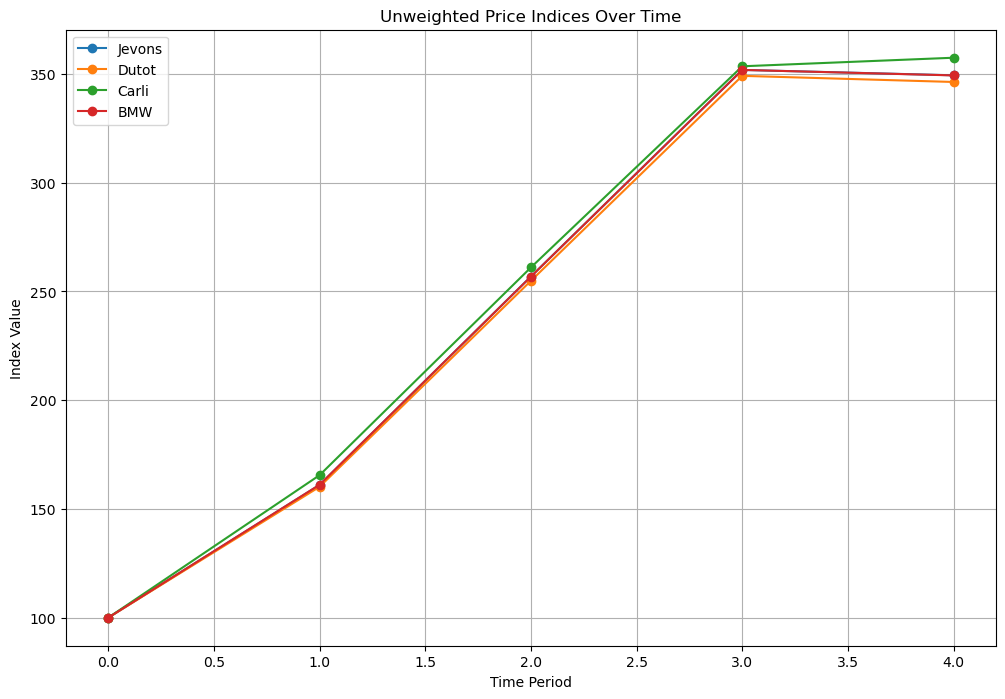

In [82]:
# Unweighted index calculation functions are assumed to be defined already

# Initialize unweighted indices
unweighted_indices = {
    "Jevons": [100.0],  # Start with 100.0 for the base period
    "Dutot": [100.0],   # Start with 100.0 for the base period
    "Carli": [100.0],   # Start with 100.0 for the base period
    "BMW": [100.0]      # Start with 100.0 for the base period
}

# Calculate unweighted indices for each time period
for t in time_periods[1:]:
    prices_0, _ = get_data_for_period(prices_data, quantities_data, 0)
    prices_t, _ = get_data_for_period(prices_data, quantities_data, t)
    
    unweighted_indices["Jevons"].append(jevons_index(prices_0, prices_t))
    unweighted_indices["Dutot"].append(dutot_index(prices_0, prices_t))
    unweighted_indices["Carli"].append(carli_index(prices_0, prices_t))
    unweighted_indices["BMW"].append(bmw_index(prices_0, prices_t))

# Plot unweighted indices
plot_indices(time_periods, unweighted_indices, "Unweighted Price Indices Over Time")


#### Weighted Indices

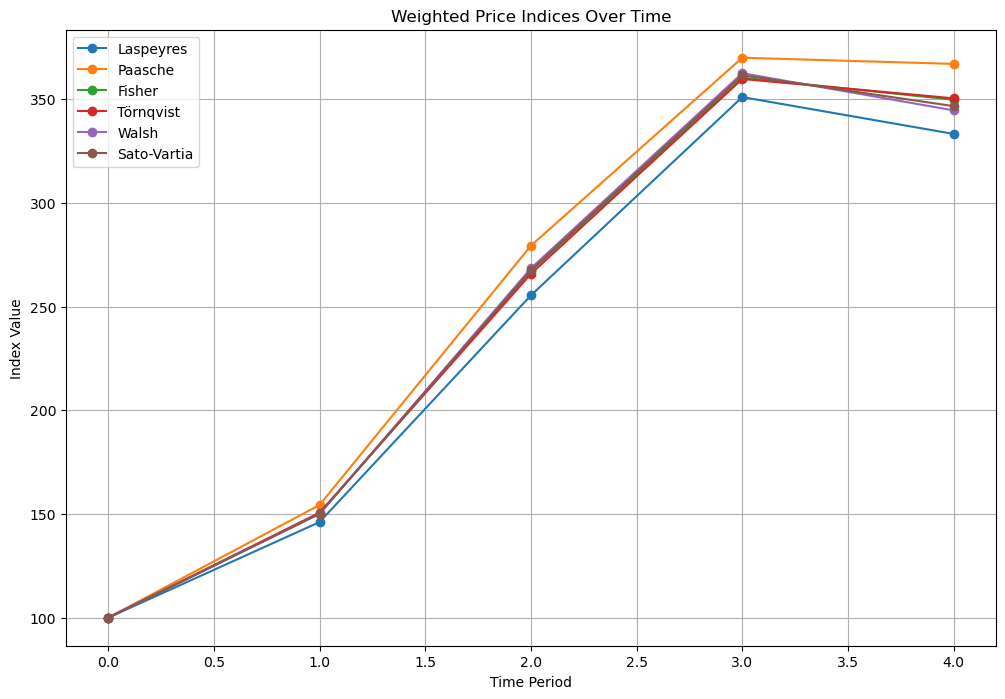

In [83]:
# Weighted index calculation functions are assumed to be defined already

# Initialize weighted indices
weighted_indices = {
    "Laspeyres": [100.0],  # Start with 100.0 for the base period
    "Paasche": [100.0],    # Start with 100.0 for the base period
    "Fisher": [100.0],     # Start with 100.0 for the base period
    "Törnqvist": [100.0],  # Start with 100.0 for the base period
    "Walsh": [100.0],      # Start with 100.0 for the base period
    "Sato-Vartia": [100.0] # Start with 100.0 for the base period
}

# Calculate weighted indices for each time period
for t in time_periods[1:]:
    prices_0, quantities_0 = get_data_for_period(prices_data, quantities_data, 0)
    prices_t, quantities_t = get_data_for_period(prices_data, quantities_data, t)
    
    weighted_indices["Laspeyres"].append(laspeyres_index(prices_0, prices_t, quantities_0))
    weighted_indices["Paasche"].append(paasche_index(prices_0, prices_t, quantities_t))
    weighted_indices["Fisher"].append(fisher_index(prices_0, prices_t, quantities_0, quantities_t))
    weighted_indices["Törnqvist"].append(tornqvist_index(prices_0, prices_t, quantities_0, quantities_t))
    weighted_indices["Walsh"].append(walsh_index(prices_0, prices_t, quantities_0, quantities_t))
    weighted_indices["Sato-Vartia"].append(sato_vartia_index(prices_0, prices_t, quantities_0, quantities_t))

# Plot weighted indices
plot_indices(time_periods, weighted_indices, "Weighted Price Indices Over Time")
